<h1>An Exploratory Data Analysis on Dengue Cases in the Philippines</h1>
<h2>Inclusive Year:2016-2020</h2>
<h3>Analyst: <b>Jamaica M. loria</b><h3>

<h2>Data Preparation</h2>

In [91]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway 

In [92]:
dengue = pd.read_csv('dataset//dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [93]:
dengue['Fatality_rate'] = (dengue['Dengue_Deaths']/dengue['Dengue_Deaths']) * 100

In [94]:
dengue.isnull().sum()

Month              0
Year               0
Region             0
Dengue_Cases       0
Dengue_Deaths      0
Fatality_rate    170
dtype: int64

In [95]:
dengue['Fatality_rate'] = dengue['Fatality_rate'].fillna(dengue['Fatality_rate'].mode()[0])

In [96]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
Fatality_rate    0
dtype: int64

In [97]:
dengue.dtypes

Month             object
Year               int64
Region            object
Dengue_Cases       int64
Dengue_Deaths      int64
Fatality_rate    float64
dtype: object

In [98]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')
dengue['Fatality_rate'] = dengue['Fatality_rate'].astype('category')

In [99]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
Fatality_rate    category
dtype: object

<h1>INSIGHT 1</h1>

<h2>Which region has the most and fewest dengue cases?</h2>

In [100]:
insight1 = dengue.groupby(['Region']) ['Dengue_Cases'].sum().reset_index()
insight1

,Region,Dengue_Cases
0,BARMM,11537
1,CAR,30582
2,NCR,115966
3,Region I,59066
4,Region II,45141
5,Region III,131064
6,Region IV-A,163029
7,Region IV-B,30849
8,Region IX,47781
9,Region V,22167


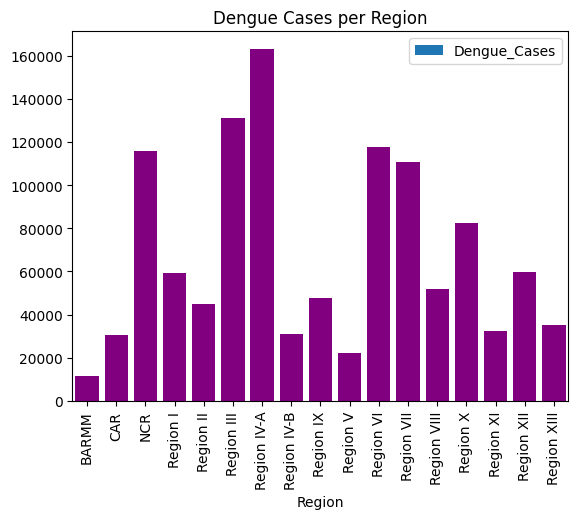

In [101]:
insight1.plot(kind='bar', x='Region', y='Dengue_Cases')
x = insight1['Region']
y = insight1['Dengue_Cases']
plt.title('Dengue Cases per Region')
plt.bar(x,y, color='purple')
plt.show()

<h2>Answer 1: Based on the dataset and visualization, <b>REGION IV-A has the most</b> dengue cases while <b>BARMM has the fewest</b> dengue cases <h2>

<h1>INSIGHT 2</h1>

<h2>Which region has the most and fewest deaths caused by dengue </h2>

In [102]:
insight2 = dengue.groupby(['Region']) ['Dengue_Deaths'].sum().reset_index()
insight2

,Region,Dengue_Deaths
0,BARMM,332
1,CAR,1008
2,NCR,4008
3,Region I,157
4,Region II,193
5,Region III,482
6,Region IV-A,652
7,Region IV-B,130
8,Region IX,532
9,Region V,185


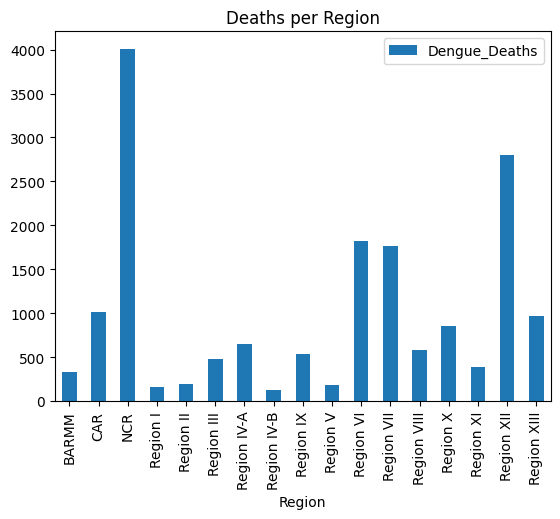

In [103]:
insight2.plot(kind='bar',x='Region',y='Dengue_Deaths')
x=insight1['Region']
y=insight2['Dengue_Deaths']
plt.title('Deaths per Region')
plt.show()

<h2>Answer 2: Although Region 4A has the highest number of dengue cases, the results now show that <b>NCR has the highest</b> number of deaths, while <b>Region IV-B has the fewest deaths</b>.<h2>

<h1>INSIGHT 3</h1>

<h2>What is the total number of dengue cases each year?</h2>

In [104]:
insight3 = dengue.groupby('Year') ['Dengue_Cases'].sum()
insight3

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

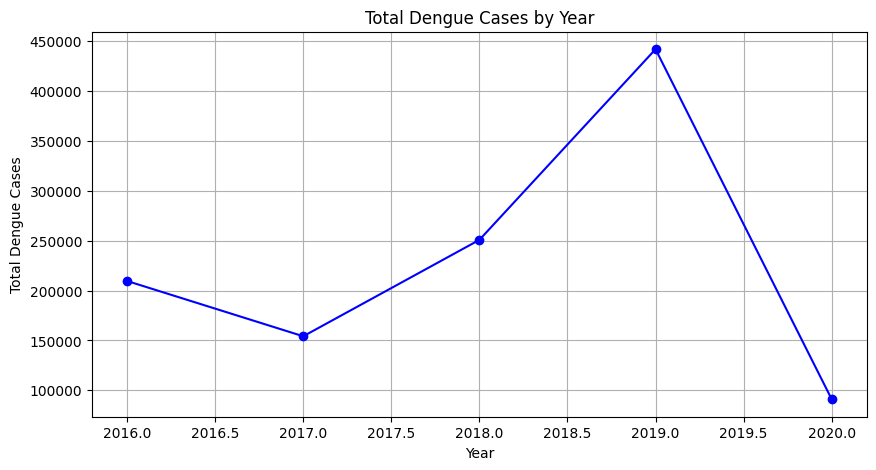

In [105]:
plt.figure(figsize=(10,5))
insight3.plot(kind='line', marker='o', color='b')
plt.title('Total Dengue Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.grid(True)
plt.show()


<h2>Answer 3: The number of dengue cases varied each year, with the <b>highest number in 2019 at 441,902 cases and the lowest in 2020 with 91,041 cases</b>. The cases increased significantly in 2018 and 2019, but dropped sharply in 2020, likely due to COVID-19 restriction<h2>


<h1>INSIGHT 4</h1>

<h2>What is the number of deaths caused by dengue each year?"</h2>

In [106]:
insight4 = dengue.groupby('Year') ['Dengue_Deaths'].sum()
insight4

Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64

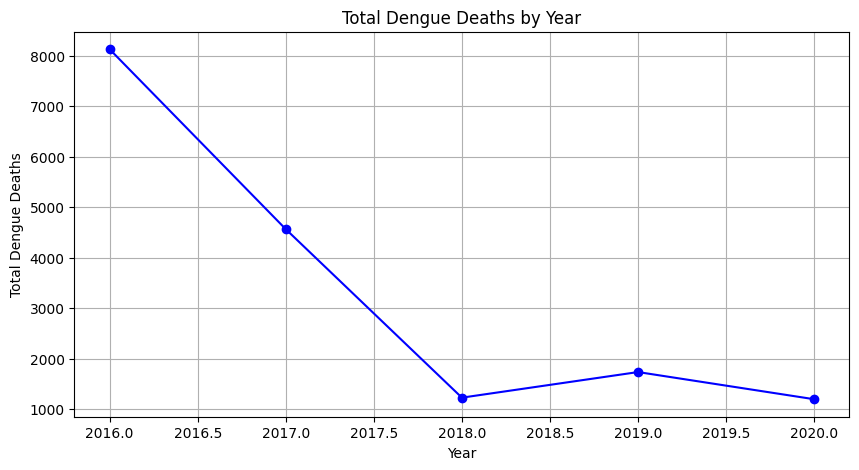

In [107]:
plt.figure(figsize=(10,5))
insight4.plot(kind='line', marker='o', color='b')
plt.title('Total Dengue Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Deaths')
plt.grid(True)
plt.show()


<h2>Answer 4: The number of deaths caused by dengue started <b>high in 2016 with 8,127 deaths</b> and decreased each year. By <b>2020, the number dropped to 1,195 deaths</b>, which is the lowest in the five years.<h2>

<h1>INSIGHT 5</h1>

<h2>What is the total number of dengue cases each month?</h2>

In [108]:
insight5 = dengue.groupby('Month') ['Dengue_Cases'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 
               'June', 'July', 'August', 'September', 'October', 
               'November', 'December']
insight5 = insight5.reindex(month_order)
insight5


Month
January       84328
February      77801
March         57576
April         32508
May           32387
June          58110
July         138242
August       187554
September    177943
October      117645
November      94900
December      88431
Name: Dengue_Cases, dtype: int64

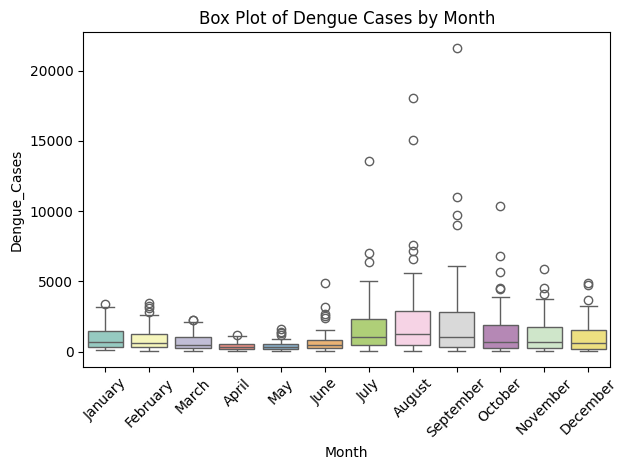

In [109]:
sns.boxplot(x='Month', y='Dengue_Cases', data=dengue,order = month_order, palette="Set3")
plt.title('Box Plot of Dengue Cases by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Answer 5: The total number of dengue cases is <b>highest in July and August, with over 170,000 cases</b> each month. The <b>lowest total number of cases occurs in April and May, with around 32,000 to 33,000 cases</b> each month.<h2>

<h1>INSIGHT 6</h1>

<h2>What is the total number of deaths due to dengue each month?</h2>

In [110]:
insight6 = dengue.groupby('Month') ['Dengue_Deaths'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 
               'June', 'July', 'August', 'September', 'October', 
               'November', 'December']
insight6 = insight6.reindex(month_order)
insight6


Month
January       394
February      315
March         291
April         200
May           162
June          322
July          611
August        714
September    6148
October      6670
November      613
December      404
Name: Dengue_Deaths, dtype: int64

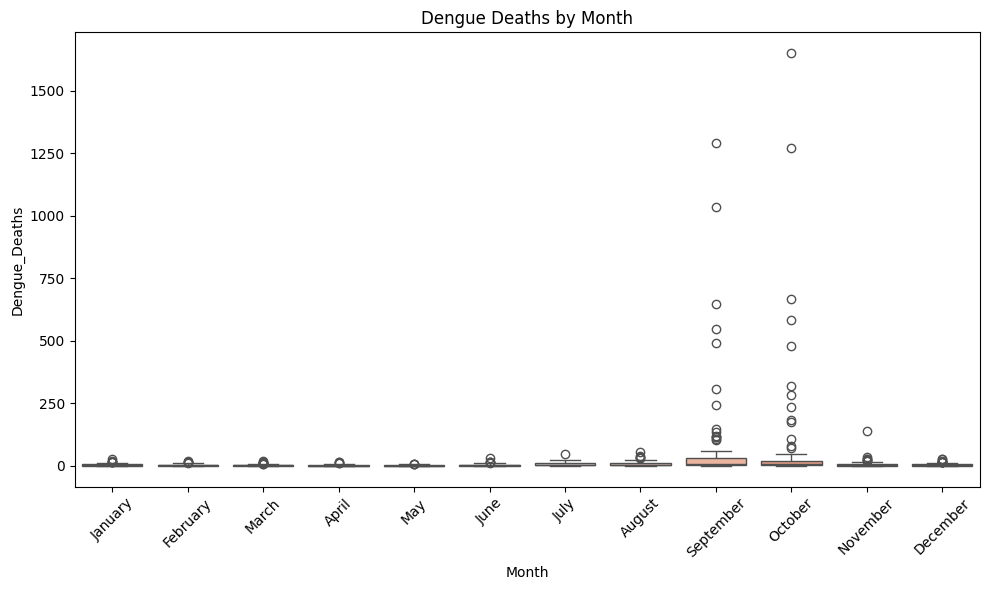

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Dengue_Deaths', data=dengue,order = month_order, palette="coolwarm")
plt.title('Dengue Deaths by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>Answer 6: The highest number of dengue deaths occurs in <b>October and September, with over 6,000 deaths</b> each month. The lowest number of deaths is recorded in <b>May with only 162 deaths</b>.<h2>

<h1>INSIGHT 7</h1>

<h2>How do the annual cases and deaths of dengue compare over the years?</h2>

In [112]:
insight7 = dengue.groupby('Year')[['Dengue_Cases','Dengue_Deaths']].sum()
insight7

,Dengue_Cases,Dengue_Deaths
Year,,
2016,209544,8127
2017,154155,4563
2018,250783,1226
2019,441902,1733
2020,91041,1195


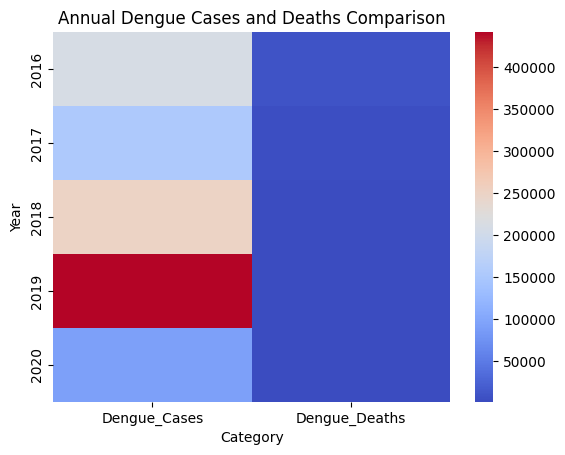

In [113]:
sns.heatmap(insight7,cmap='coolwarm')
plt.title('Annual Dengue Cases and Deaths Comparison')
plt.xlabel('Category')
plt.ylabel('Year')
plt.show()

<h2>Answer 7: In 2016, there were the highest number of dengue cases and deaths. Since then, the number of cases decreased, while deaths also dropped significantly in 2017 and 2018 before rising again in 2019.<h2>

<h1>INSIGHT 8</h1>

<h2>What is the estimated Fatality rate of dengue each year?</h2>

In [114]:
insight8 = dengue.groupby('Year').agg({'Dengue_Cases':'sum','Dengue_Deaths':'sum'}).reset_index()
insight8['Fatality_rate(%)'] = (insight8['Dengue_Deaths']/insight8['Dengue_Cases']) * 100
insight8

,Year,Dengue_Cases,Dengue_Deaths,Fatality_rate(%)
0,2016,209544,8127,3.878422
1,2017,154155,4563,2.960008
2,2018,250783,1226,0.488869
3,2019,441902,1733,0.392168
4,2020,91041,1195,1.312595


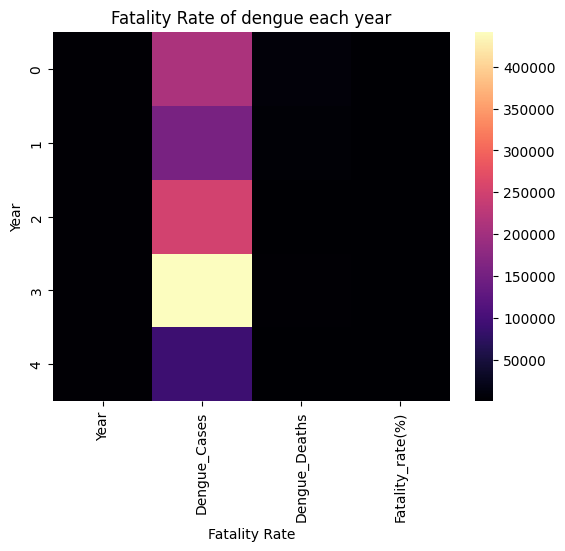

In [115]:
sns.heatmap(insight8,cmap='magma')
plt.title('Fatality Rate of dengue each year')
plt.xlabel('Fatality Rate')
plt.ylabel('Year')
plt.show()

<h2>Answer 8: The estimated dengue fatality rates were <b>3.88% in 2016, 2.96% in 2017, 0.49% in 2018, 0.39% in 2019, and 1.31% in 2020</b>. The fatality rate went down from 2016 to 2019 but slightly increased in 2020 despite having fewer cases.<h2>

<h1>INSIGHT 9</h1>

<h2>What is the estimated Fatality Rate of dengue each month?</h2>

In [116]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

insight9= dengue.groupby('Month').agg({'Dengue_Cases': 'sum','Dengue_Deaths': 'sum'}).reset_index()
insight9['Fatality_rate (%)'] = (insight9['Dengue_Deaths'] / insight9['Dengue_Cases']) * 100

insight9['Month'] = pd.Categorical(insight9['Month'], categories=month_order, ordered=True)
insight9 = insight9.sort_values('Month').reset_index(drop=True)


insight9


,Month,Dengue_Cases,Dengue_Deaths,Fatality_rate (%)
0,January,84328,394,0.467223
1,February,77801,315,0.404879
2,March,57576,291,0.505419
3,April,32508,200,0.615233
4,May,32387,162,0.500201
5,June,58110,322,0.554121
6,July,138242,611,0.441979
7,August,187554,714,0.380690
8,September,177943,6148,3.455039
9,October,117645,6670,5.669599


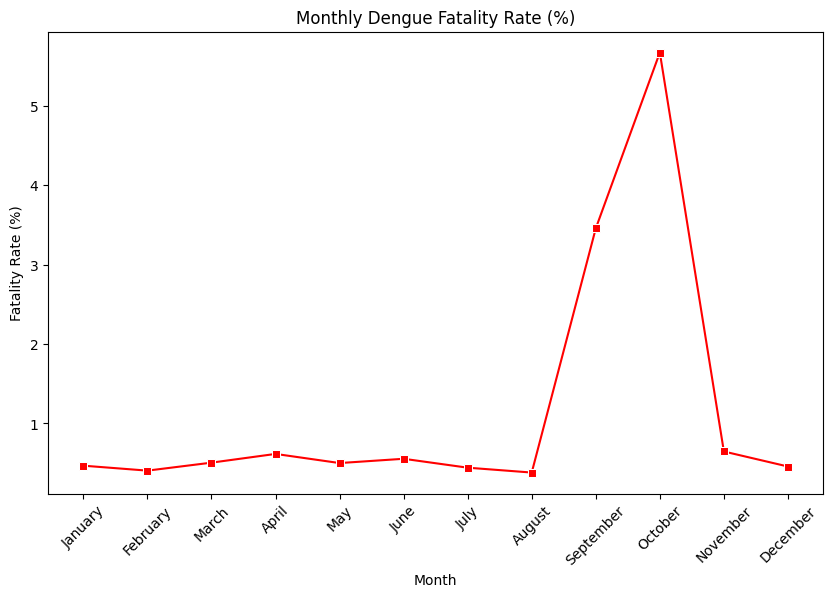

In [117]:
plt.figure(figsize=(10,6))
sns.lineplot(data=insight9, x='Month', y='Fatality_rate (%)', marker='s', color='red')
plt.title('Monthly Dengue Fatality Rate (%)')
plt.xlabel('Month')
plt.ylabel('Fatality Rate (%)')
plt.xticks(rotation=45)
plt.show()


<h2>Answer 9: The months of <b>September and October have significantly higher fatality rates, with 3.46% and 5.67%</b> respectively, compared to other months which mostly have rates below 1%. This suggests that fatal cases tend to concentrate around these months despite not always having the highest number of dengue cases.<h2>

<h1>INSIGHT 10</h1>

<h2>Which region had the highest dengue fatality rate?</h2>

In [118]:
insight10= dengue.groupby('Region').agg({'Dengue_Cases': 'sum','Dengue_Deaths': 'sum'}).reset_index()
insight10['Fatality_rate (%)'] = (insight10['Dengue_Deaths'] / insight10['Dengue_Cases']) * 100

insight10


,Region,Dengue_Cases,Dengue_Deaths,Fatality_rate (%)
0,BARMM,11537,332,2.877698
1,CAR,30582,1008,3.296057
2,NCR,115966,4008,3.456185
3,Region I,59066,157,0.265804
4,Region II,45141,193,0.427549
5,Region III,131064,482,0.367759
6,Region IV-A,163029,652,0.399929
7,Region IV-B,30849,130,0.421408
8,Region IX,47781,532,1.113413
9,Region V,22167,185,0.834574


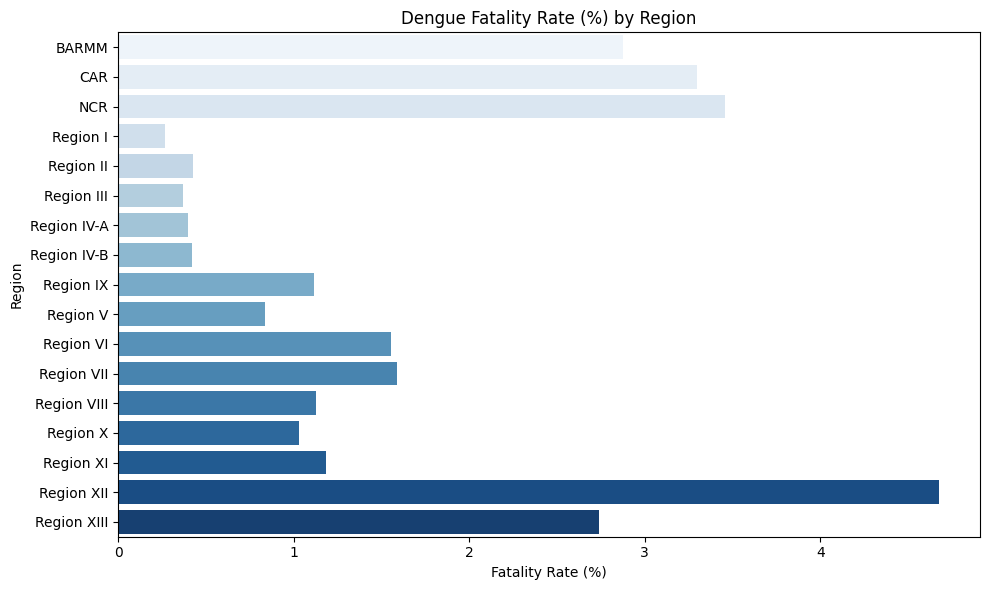

In [119]:
plt.figure(figsize=(10,6))
sns.barplot(data=insight10.sort_values('Fatality_rate (%)', ascending=False), y='Region', x='Fatality_rate (%)', palette='Blues')
plt.title('Dengue Fatality Rate (%) by Region')
plt.xlabel('Fatality Rate (%)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

<h2><b>Answer 10: Region XII has the highest dengue fatality rate at 4.68%</b>, followed by NCR (3.46%) and CAR (3.30%). On the other hand, Region I recorded the lowest fatality rate at only 0.27%, despite having a significant number of cases.<h2>

<h1>INSIGHT 11</h1>

<h2>Is there a correlation between the number of dengue cases and the number of dengue deaths</h2>

In [120]:
insight11 = dengue ['Dengue_Cases'].corr(dengue['Dengue_Deaths'])
insight11

0.03832213720419488

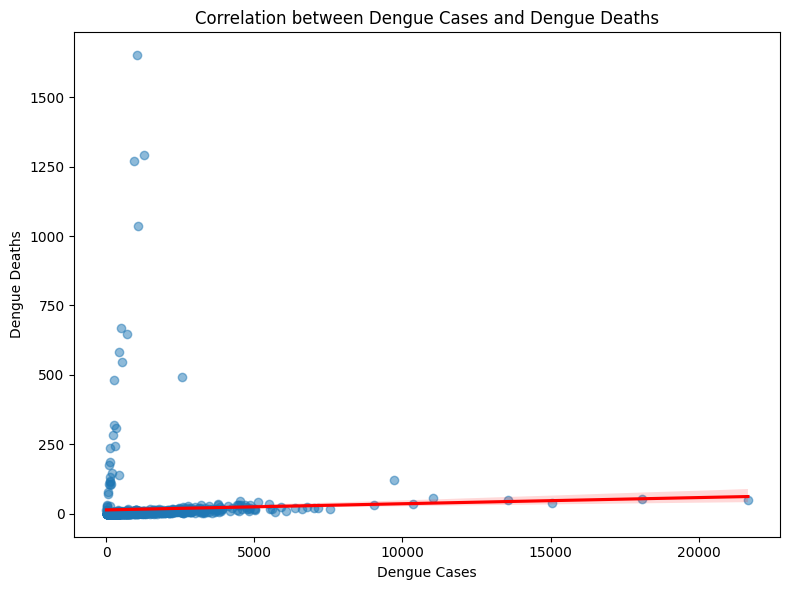

In [121]:
plt.figure(figsize=(8,6))
sns.regplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Correlation between Dengue Cases and Dengue Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.tight_layout()
plt.show()

<h2>Answer 11:There is <b>no correlation</b> between the number of dengue cases and the number of dengue deaths<h2>

<h1>INSIGHT 12</h1>

<h2>Is there a correlation between the number of dengue cases and the years when the cases occurred?</h2>

In [122]:
insight12 = dengue ['Dengue_Cases'].corr(dengue['Year'])
insight12

0.021167362686236268

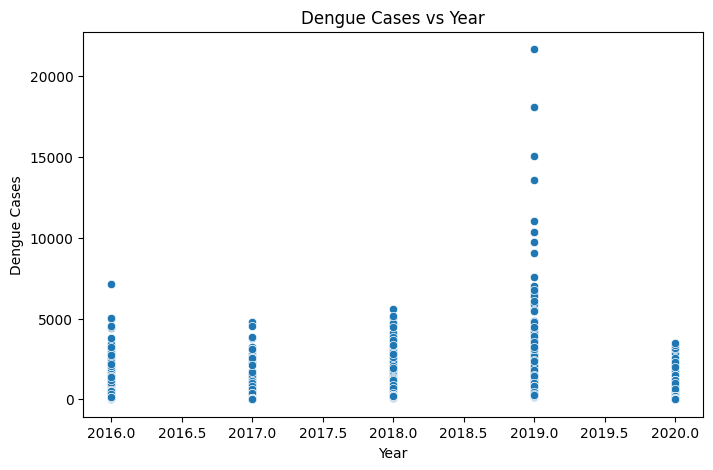

In [123]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=dengue, x='Year', y='Dengue_Cases')
plt.title('Dengue Cases vs Year')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.show()

<h2>Answer 12: There is <b>no significant correlation</b> between the number of dengue cases and the year. This suggests that dengue cases do not consistently increase or decrease over time during the observed period."<h2>

<h1>INSIGHT 13</h1>

<h2>Is there a correlation between the number of dengue deaths and the years when the deaths occured?</h2>

In [124]:
insight13 = dengue ['Dengue_Deaths'].corr(dengue['Year'])
insight13

-0.12016264713841332

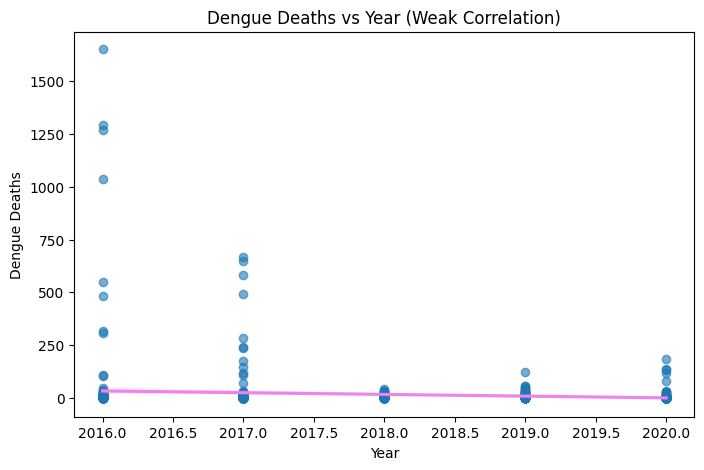

In [125]:
plt.figure(figsize=(8,5))
sns.regplot(data=dengue, x='Year', y='Dengue_Deaths', scatter_kws={'alpha':0.6}, line_kws={'color':'violet'})
plt.title('Dengue Deaths vs Year (Weak Correlation)')
plt.xlabel('Year')
plt.ylabel('Dengue Deaths')
plt.show()

<h2>Answer 13: The correlation analysis shows a <b>weak negative relationship (-0.12)</b> between the number of dengue deaths and the years, indicating that dengue deaths did not follow a clear increasing or decreasing trend over the years.<h2>

<h1>INSIGHT 14</h1>

<h2>What are the top 3 regions with the highest and lowest dengue fatality rates in the Philippines?</h2>

In [126]:
insight14_highest = insight10.sort_values('Fatality_rate (%)', ascending=False).head(3)
print("Top 3 Regions with Highest Fatality Rate:")
print(insight14_highest)

insight14_lowest = insight10.sort_values('Fatality_rate (%)', ascending=True).head(3)
print("\nTop 3 Regions with Lowest Fatality Rate:")
print(insight14_lowest)


Top 3 Regions with Highest Fatality Rate:
        Region  Dengue_Cases  Dengue_Deaths  Fatality_rate (%)
15  Region XII         59802           2796           4.675429
2          NCR        115966           4008           3.456185
1          CAR         30582           1008           3.296057

Top 3 Regions with Lowest Fatality Rate:
        Region  Dengue_Cases  Dengue_Deaths  Fatality_rate (%)
3     Region I         59066            157           0.265804
5   Region III        131064            482           0.367759
6  Region IV-A        163029            652           0.399929


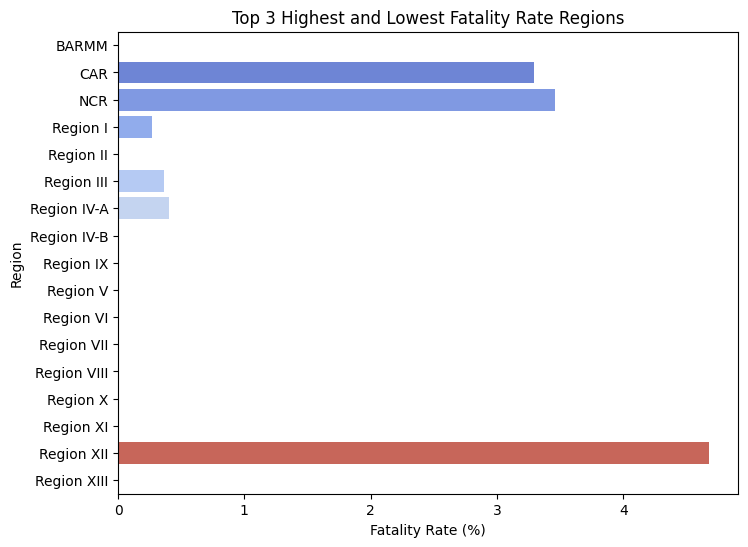

In [127]:
top_regions = pd.concat([insight14_highest, insight14_lowest])
plt.figure(figsize=(8,6))
sns.barplot(data=top_regions, x='Fatality_rate (%)', y='Region', palette='coolwarm')
plt.title('Top 3 Highest and Lowest Fatality Rate Regions')
plt.xlabel('Fatality Rate (%)')
plt.ylabel('Region')
plt.show()

<h2>Answer 14: The top 3 regions with the <b>highest dengue fatality rates are Region XII, NCR, and CAR</b>. On the other hand, <b>Region I, Region III, and Region IV-A recorded the lowest</b> fatality rates.<h2>

<h1>INSIGHT 15</h1>

<h2>Which regions show the greatest improvement (or worsening) in fatality rate over time?</h2>

In [128]:
insight15 = dengue.groupby(['Region', 'Year']).agg({'Dengue_Cases':'sum', 'Dengue_Deaths':'sum'}).reset_index()
insight15['Fatality_rate (%)'] = (insight15['Dengue_Deaths'] / insight15['Dengue_Cases']) * 100

improvement = insight15.groupby('Region').apply(lambda x: x.loc[x['Year'] == x['Year'].max(), 'Fatality_rate (%)'].values[0] - 
                                                           x.loc[x['Year'] == x['Year'].min(), 'Fatality_rate (%)'].values[0]).reset_index(name='Change_in_Fatality_Rate')

improvement = improvement.sort_values('Change_in_Fatality_Rate', ascending=True)
improvement


,Region,Change_in_Fatality_Rate
2,NCR,-16.249179
16,Region XIII,-9.939356
15,Region XII,-9.110067
0,BARMM,-8.809080
1,CAR,-2.248705
12,Region VIII,-0.531166
11,Region VII,-0.391398
14,Region XI,-0.111243
6,Region IV-A,-0.084729
3,Region I,-0.002582


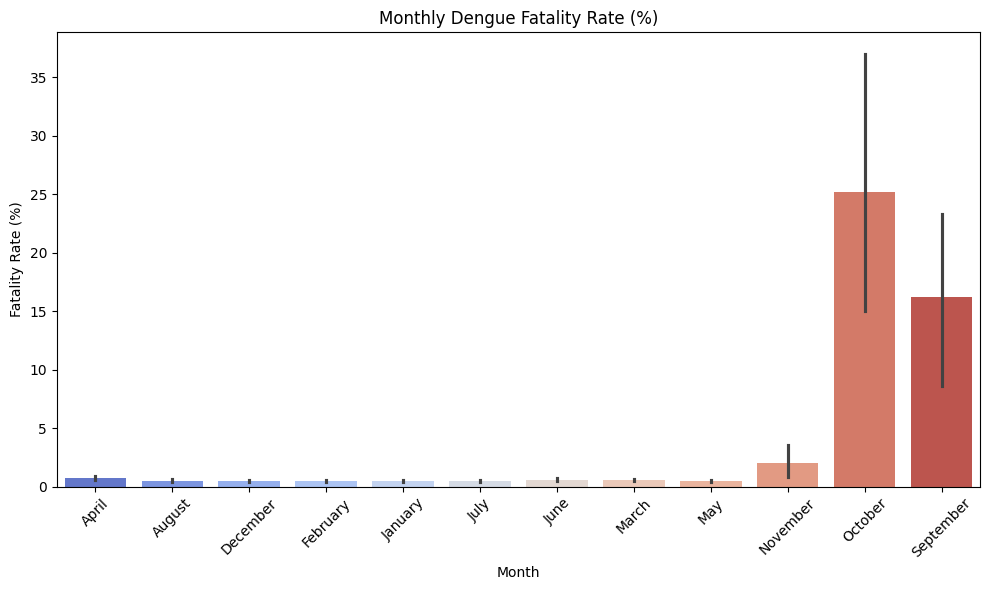

In [129]:
dengue['Fatality_rate'] = (dengue['Dengue_Deaths']/dengue['Dengue_Cases']) * 100

plt.figure(figsize=(10,6))
sns.barplot(data=dengue, x='Month', y='Fatality_rate', palette='coolwarm')
plt.title('Monthly Dengue Fatality Rate (%)')
plt.xlabel('Month')
plt.ylabel('Fatality Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Answer 15: The result shows that <b>NCR, Region XIII, and Region XII had the biggest decrease</b> in fatality rates, meaning fewer deaths compared to past years. However,<b>Region V and a few others slightly increased</b> their fatality rates, but the increase was very small.<h2>

<h1>INSIGHT 16</h1>

<h2>Do rainy season months show higher dengue cases?</h2>

In [130]:
rainy_months = ['June', 'July', 'August', 'September', 'October', 'November']
dengue['Season'] = dengue['Month'].apply(lambda x: 'Rainy' if x in rainy_months else 'Dry')

insight16 = dengue.groupby('Season').agg({'Dengue_Cases':'sum'}).reset_index()
insight16

,Season,Dengue_Cases
0,Dry,373031
1,Rainy,774394


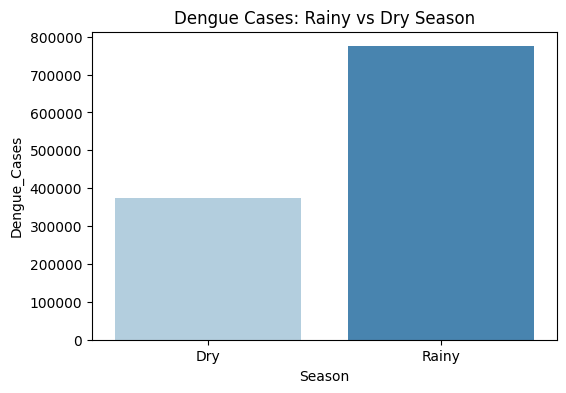

In [131]:
plt.figure(figsize=(6,4))
sns.barplot(x='Season', y='Dengue_Cases', data=insight16, palette='Blues')
plt.title('Dengue Cases: Rainy vs Dry Season')
plt.show()

<h2>Answer 16: The result shows that dengue cases are much <b>higher during the rainy season (774,394 cases) compared to the dry season (373,031 cases)</b>. This suggests that the rainy months contribute significantly to the increase in dengue cases.<h2>

<h1>INSIGHT 17</h1>

In [132]:
insight17= insight10[insight10['Region'] == 'Region XII']
print(insight17)

insight10_sorted = insight10.sort_values('Fatality_rate (%)', ascending=False).reset_index(drop=True)
print(insight10_sorted)


        Region  Dengue_Cases  Dengue_Deaths  Fatality_rate (%)
15  Region XII         59802           2796           4.675429
         Region  Dengue_Cases  Dengue_Deaths  Fatality_rate (%)
0    Region XII         59802           2796           4.675429
1           NCR        115966           4008           3.456185
2           CAR         30582           1008           3.296057
3         BARMM         11537            332           2.877698
4   Region XIII         35293            966           2.737087
5    Region VII        110683           1760           1.590127
6     Region VI        117523           1825           1.552888
7     Region XI         32522            385           1.183814
8   Region VIII         51983            585           1.125368
9     Region IX         47781            532           1.113413
10     Region X         82437            848           1.028664
11     Region V         22167            185           0.834574
12    Region II         45141            1

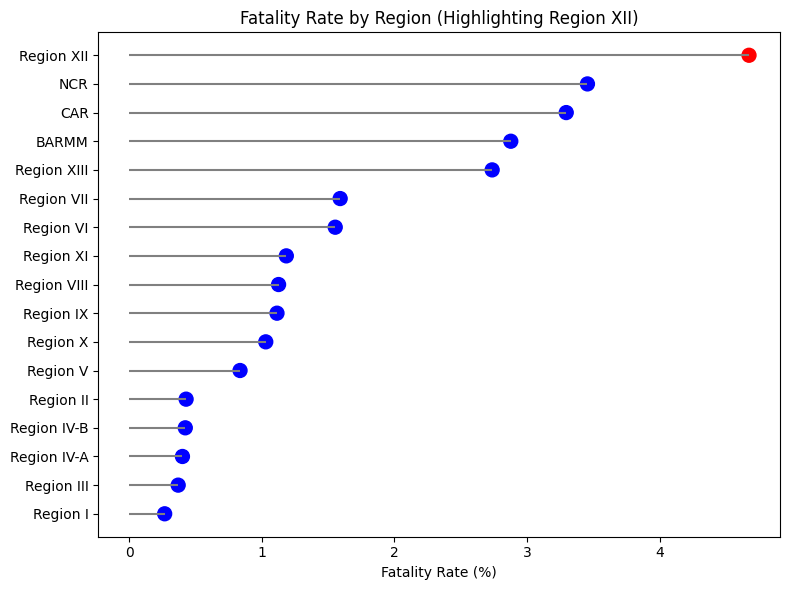

In [133]:
insight10_sorted = insight10.sort_values('Fatality_rate (%)', ascending=True)

plt.figure(figsize=(8,6))
plt.hlines(y=insight10_sorted['Region'], xmin=0, xmax=insight10_sorted['Fatality_rate (%)'], color='gray')
plt.scatter(insight10_sorted['Fatality_rate (%)'], insight10_sorted['Region'],
            color=['red' if r == 'Region XII' else 'blue' for r in insight10_sorted['Region']], s=100)

plt.xlabel('Fatality Rate (%)')
plt.title('Fatality Rate by Region (Highlighting Region XII)')
plt.tight_layout()
plt.show()


<h2>Answer 17: Region XII has the highest fatality rate among all regions, with a <b>fatality rate of 4.67%</b>, which is higher than the national average and higher than all other regions. This shows that Region XII experienced more deaths relative to its number of dengue cases compared to other regions.<h2>

<h1>INSIGHT 18</h1>

<h2>Which month and year recorded the highest number of dengue-related deaths?</h2>

In [134]:
insight18= dengue.groupby(['Year', 'Month'])['Dengue_Deaths'].sum().reset_index()
highest_month_year = insight18.loc[insight18['Dengue_Deaths'].idxmax()]

print("Month and Year with the highest dengue deaths:")
print(highest_month_year)

Month and Year with the highest dengue deaths:
Year                2016
Month            October
Dengue_Deaths       3954
Name: 10, dtype: object


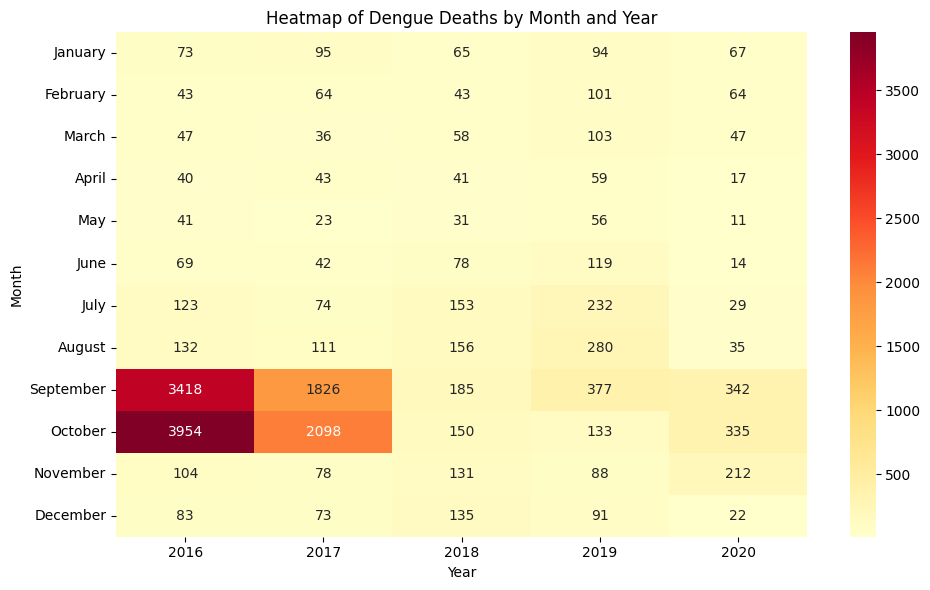

In [135]:
pivot_deaths = dengue.pivot_table(values='Dengue_Deaths', index='Month', columns='Year', aggfunc='sum')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_deaths = pivot_deaths.reindex(month_order)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_deaths, annot=True, fmt=".0f", cmap='YlOrRd')
plt.title('Heatmap of Dengue Deaths by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()


<h2>Answer 18: The month and year with the highest number of dengue deaths was <b>October 2016</b>, recording a total of <b>3,954 deaths</b><h2>

<h1>INSIGHT 19</h1>

<h2>Is there a noticeable trend in dengue cases before and after 2019 (pre- and post-pandemic)?</h2>

In [136]:
dengue['Period'] = dengue['Year'].apply(lambda x: 'Pre-Pandemic' if x < 2019 else 'Post-Pandemic')
insight19= dengue.groupby('Period')['Dengue_Cases'].sum().reset_index()

print(insight19)

          Period  Dengue_Cases
0  Post-Pandemic        532943
1   Pre-Pandemic        614482


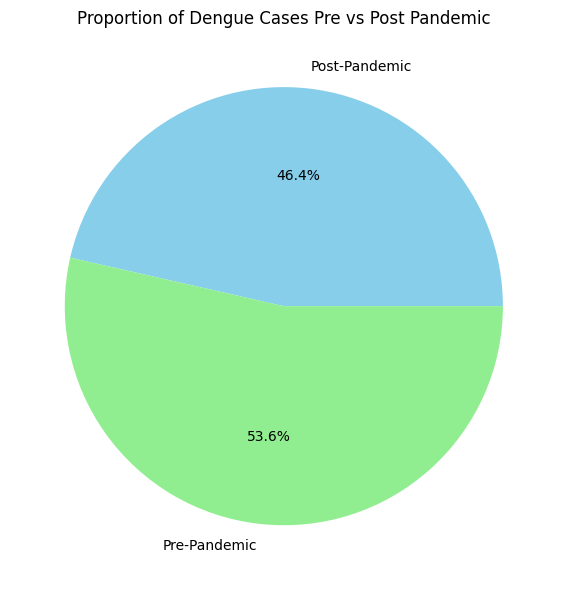

In [137]:
plt.figure(figsize=(6,6))
plt.pie(insight19['Dengue_Cases'], labels=insight19['Period'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Dengue Cases Pre vs Post Pandemic')
plt.tight_layout()
plt.show()


<h2>Answer 19:There is <b>no noticeable increasing trend</b> after the pandemic. In fact, the total dengue cases during the post-pandemic period (532,943 cases) were lower compared to the pre-pandemic period (614,482 cases).<h2>

<h1>INSIGHT 20</h1>

<h2>How does the fatality rate vary between the rainy and dry seasons?</h2>

In [138]:
insight20 = dengue.groupby('Season').agg({'Dengue_Cases': 'sum', 'Dengue_Deaths': 'sum'}).reset_index()
insight20['Fatality_Rate (%)'] = (insight20['Dengue_Deaths'] / insight20['Dengue_Cases']) * 100

print(insight20)


  Season  Dengue_Cases  Dengue_Deaths  Fatality_Rate (%)
0    Dry        373031           1766           0.473419
1  Rainy        774394          15078           1.947071


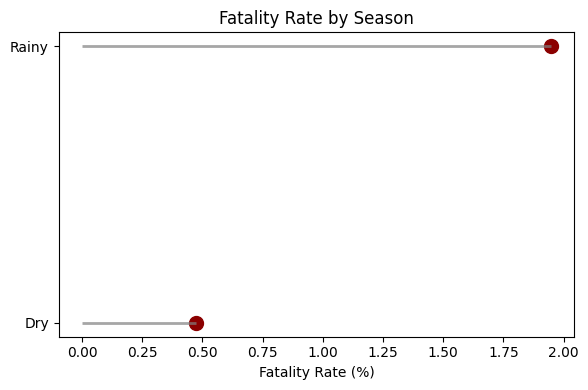

In [139]:
plt.figure(figsize=(6,4))
plt.hlines(y=insight20['Season'], xmin=0, xmax=insight20['Fatality_Rate (%)'], color='gray', alpha=0.7, linewidth=2)
plt.scatter(insight20['Fatality_Rate (%)'], insight20['Season'], color='darkred', s=100)
plt.xlabel('Fatality Rate (%)')
plt.title('Fatality Rate by Season')
plt.tight_layout()
plt.show()


<h2>The fatality rate during the <b>rainy season (1.95%) is significantly higher than during the dry season (0.47%)</b>, suggesting that dengue cases during the rainy season are not only more frequent but also more deadly.</h2>